In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Simulate sensor data
data = {
    'Temperature': np.random.normal(loc=30, scale=5, size=100),
    'Pressure': np.random.normal(loc=5, scale=2, size=100)
}

df = pd.DataFrame(data)

# Label the data
def label_data(row):
    if row['Temperature'] > 37:
        return 'Hot'
    elif row['Temperature'] < 20:
        return 'Cold'
    elif row['Pressure'] > 8:
        return 'Hard Pressure'
    elif row['Pressure'] < 3:
        return 'Soft Pressure'
    else:
        return 'Normal'

df['Label'] = df.apply(label_data, axis=1)

df.head()


,Temperature,Pressure,Label
0,27.068398,10.582356,Hard Pressure
1,27.363193,1.439021,Soft Pressure
2,33.017728,4.385070,Normal
3,27.170391,5.641692,Normal
4,35.723264,6.585010,Normal


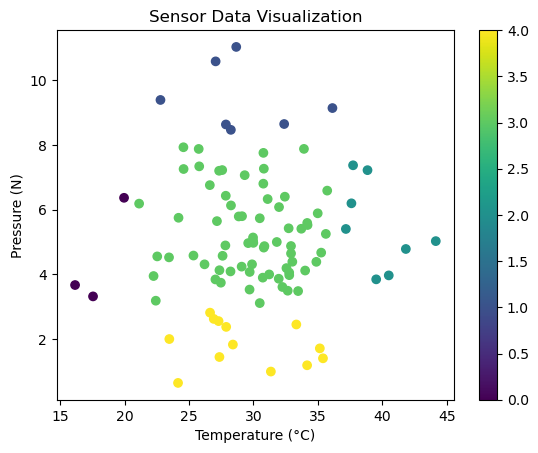

In [22]:
plt.scatter(df['Temperature'], df['Pressure'], c=df['Label'].astype('category').cat.codes, cmap='viridis')
plt.xlabel('Temperature (°C)')
plt.ylabel('Pressure (N)')
plt.title('Sensor Data Visualization')
plt.colorbar()
plt.show()


In [23]:
X = df[['Temperature', 'Pressure']]
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [26]:
y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Classification Report:

               precision    recall  f1-score   support

         Cold       1.00      1.00      1.00         1
Hard Pressure       1.00      1.00      1.00         2
       Normal       1.00      1.00      1.00        16
Soft Pressure       1.00      1.00      1.00         1

     accuracy                           1.00        20
    macro avg       1.00      1.00      1.00        20
 weighted avg       1.00      1.00      1.00        20


Confusion Matrix:

[[ 1  0  0  0]
 [ 0  2  0  0]
 [ 0  0 16  0]
 [ 0  0  0  1]]


In [ ]:
# New simulated readings
new_data = pd.DataFrame({
    'Temperature': [39, 18, 29, 32],
    'Pressure': [5, 2, 9, 4]
})

predictions = model.predict(new_data)
print("\nPredictions for new sensor data:")
print(predictions)



Predictions for new sensor data:
['Hot' 'Soft Pressure' 'Hard Pressure' 'Normal']
